In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid=pd.read_csv(r'C:\Users\Saurav Kumar\projects\covid\covid.csv')
df=covid.copy()

print(df.shape)
df.head()

(19623, 8)


,dates,state,confirmed,tested,deceased,recovered,vaccinated,population
0,2020-05-04,SK,0,170,0,0,0,664000
1,2020-05-05,SK,0,11,0,0,0,664000
2,2020-05-06,SK,0,8,0,0,0,664000
3,2020-05-07,SK,0,27,0,0,0,664000
4,2020-05-08,SK,0,0,0,0,0,664000


### Looking for Null Values

In [5]:
df.isnull().sum()

dates         0
state         0
confirmed     0
tested        0
deceased      0
recovered     0
vaccinated    0
population    0
dtype: int64

In [6]:
df.columns

Index(['dates', 'state', 'confirmed', 'tested', 'deceased', 'recovered',
       'vaccinated', 'population'],
      dtype='object')

### In *df* dataframe , data is stored datewise for every state meaning for every date we have values from every state. In order to obtain data for the whole country, we need to group the data with respect to dates.

In [7]:
grouped_dates=df.groupby('dates').sum().reset_index()
grouped_dates

,dates,confirmed,tested,deceased,recovered,vaccinated,population
0,2020-01-30,2,0,0,0,0,1368025000
1,2020-02-02,2,0,0,0,0,1368025000
2,2020-02-03,2,0,0,0,0,1368025000
3,2020-02-14,0,0,0,6,0,1368025000
4,2020-03-02,4,0,0,0,0,1425059000
...,...,...,...,...,...,...,...
555,2021-09-04,85214,3723523,618,76174,14916632,2665798000
556,2021-09-05,79074,3207693,436,87844,5744237,2665798000
557,2021-09-06,60328,3288020,580,85892,23041786,2665798000
558,2021-09-07,76270,3488486,736,78202,16960181,2665798000


### Kde plot for **Daily confirmed cases** in India

<AxesSubplot:xlabel='confirmed', ylabel='Density'>

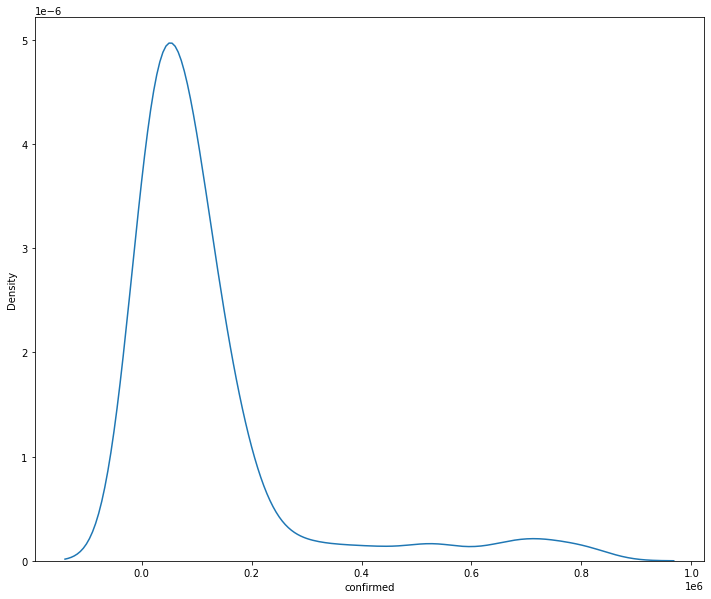

In [8]:
plt.figure(figsize=(12,10))
sns.kdeplot(data=grouped_dates,x='confirmed')

### In this figure, we can see that x-axis show values above (0.6 x 10^6) which doesn't seem right beacause maximum daily rise in covid cases is around 4 lakhs for India and here it can be noted that the 'confirmed' column has values greater than 8 lakhs. So, there must be some discrepancy in the data. On analysing closely it is observed that every row in the 'grouped_dates' dataframe is showing doubled value. We need to check the data for a date and find the anamoly. Lets find out.

In [9]:
df[df.dates=='2020-05-10']

,dates,state,confirmed,tested,deceased,recovered,vaccinated,population
6,2020-05-10,SK,0,0,0,0,0,664000
237,2020-05-10,MN,0,231,0,0,0,3103000
312,2020-05-10,MZ,0,0,0,0,0,1192000
392,2020-05-10,PY,2,98,0,1,0,1504000
683,2020-05-10,NL,0,14,0,0,0,2150000
906,2020-05-10,ML,0,0,0,0,0,3224000
1373,2020-05-10,LA,0,0,0,3,0,293000
1597,2020-05-10,MP,157,4059,4,196,0,82232000
1959,2020-05-10,OR,25,3458,0,0,0,43671000
2037,2020-05-10,PB,61,1500,0,9,0,29859000


### After looking at the data thoroughly, we observed that in *df* dataframe for every date we have an extra row with name of the 'state' as 'TT' and values in this row is the sum total of entire day from every state. This explains why grouped_dates dataframe is showing doubled value. Lets remove all rows with 'TT' as 'state' name.

In [10]:
print(df.shape)
remove_ind=df[df['state']=='TT']['state'].index

print(f'Removing {len(remove_ind)} indexes')
df.drop(remove_ind,inplace=True)

df.shape


(19623, 8)
Removing 560 indexes


(19063, 8)

#### Now we got rid of all the rows having 'TT' as the state which perhaps means **Total**

### Now plotting again to visualize the correct representation of the 'Confirmed' case. 

([<matplotlib.axis.XTick at 0x20bbcd57d88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

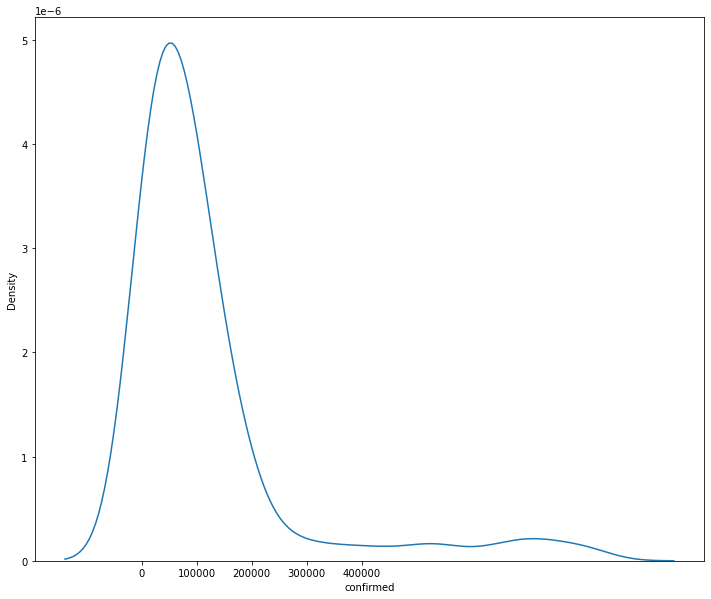

In [11]:
plt.figure(figsize=(12,10))
sns.kdeplot(data=grouped_dates,x='confirmed')
plt.xticks(np.linspace(0,400000,5))

### We can see rise in everyday cases almost represent normal distribution and most of the observation in 'confirmed' column lies in the range of 0 to 100000.

### We have to fix the 'grouped_dates' dataframe since it still has value from 'TT' state of dataframe 'df' which is nothing but the sum total of the day which was getting added for each day.

In [12]:
grouped_dates=df.groupby('dates').sum().reset_index()
grouped_dates

,dates,confirmed,tested,deceased,recovered,vaccinated,population
0,2020-01-30,1,0,0,0,0,35125000
1,2020-02-02,1,0,0,0,0,35125000
2,2020-02-03,1,0,0,0,0,35125000
3,2020-02-14,0,0,0,3,0,35125000
4,2020-03-02,2,0,0,0,0,92159000
...,...,...,...,...,...,...,...
555,2021-09-04,42607,1905343,309,38087,7458316,1332898000
556,2021-09-05,39537,1797044,218,43922,2871996,1332898000
557,2021-09-06,30164,1567539,290,42946,11520772,1332898000
558,2021-09-07,38135,1734741,368,39101,8479939,1332898000


### Let's add column 'active' which will keep track for number of active cases each day.

In [13]:
grouped_dates['active'] = grouped_dates.confirmed.cumsum() - grouped_dates.recovered.cumsum() -grouped_dates.deceased.cumsum()

grouped_dates.drop(559,axis=0,inplace=True)         # Dropping row which has incomplete data.

grouped_dates

,dates,confirmed,tested,deceased,recovered,vaccinated,population,active
0,2020-01-30,1,0,0,0,0,35125000,1
1,2020-02-02,1,0,0,0,0,35125000,2
2,2020-02-03,1,0,0,0,0,35125000,3
3,2020-02-14,0,0,0,3,0,35125000,0
4,2020-03-02,2,0,0,0,0,92159000,2
...,...,...,...,...,...,...,...,...
554,2021-09-03,42667,1936633,342,36422,6250994,1332898000,412247
555,2021-09-04,42607,1905343,309,38087,7458316,1332898000,416458
556,2021-09-05,39537,1797044,218,43922,2871996,1332898000,411855
557,2021-09-06,30164,1567539,290,42946,11520772,1332898000,398783


### Let's see rise in cases from start till current date.

<AxesSubplot:xlabel='dates', ylabel='confirmed'>

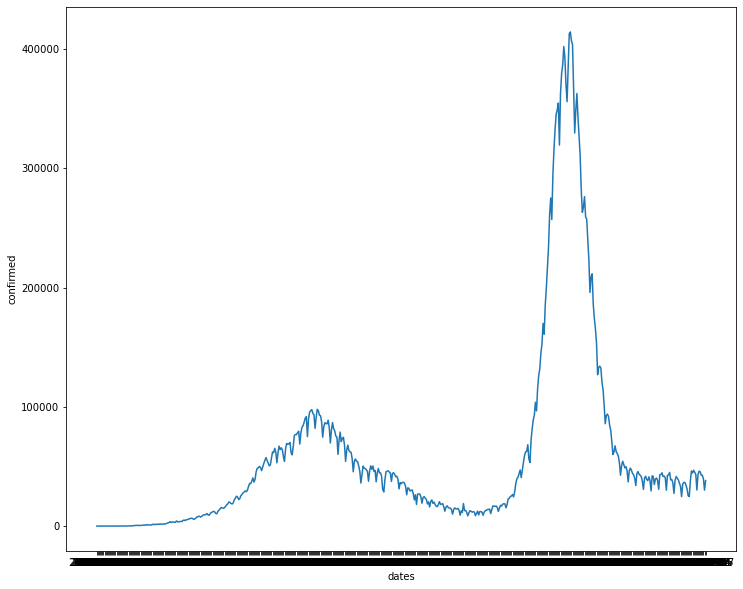

In [14]:
fig,ax=plt.subplots(figsize=(12,10))
sns.lineplot(data=grouped_dates,x='dates',y='confirmed',ax=ax,ci=None)
# ax.annotate('October',xytext=('2020-09-10',10000))

### Now, have a look at number of **active** cases in the country from start to current date. 

<AxesSubplot:xlabel='dates', ylabel='active'>

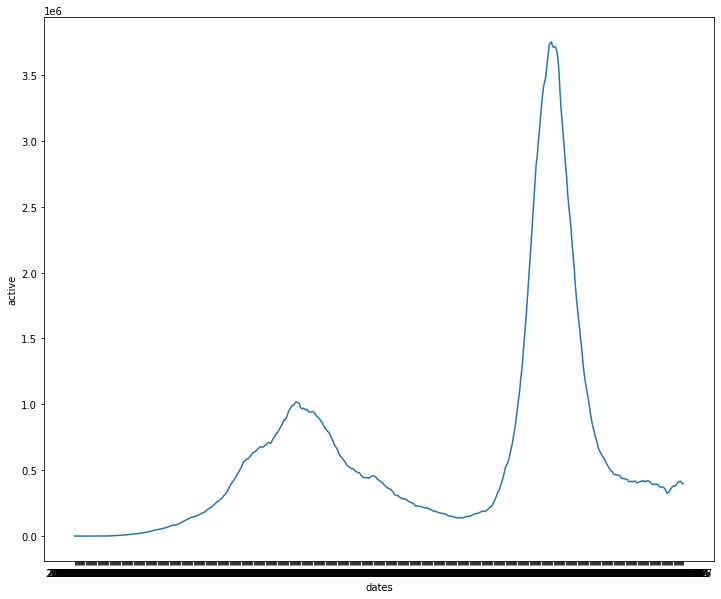

In [15]:
fig,ax=plt.subplots(figsize=(12,10))
sns.lineplot(data=grouped_dates,x='dates',y='active',ax=ax,ci=None)

### You can clearly see that we had two peaks till date where we saw number of active cases increased exponentially. 

 ### Let's find out what's the percentage of population for every state that got affected with covid and which state has highest share of covid cases in their population.

#### So, for this we need to group the data by states or we can simply take the cumulative sum over 'confirmed' column since we have scraped the arising new cases every day. 

In [16]:
state=df.groupby('state').sum()
state.eval('perc_pop_aff=confirmed/population*100',inplace=True)
state

,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff
state,,,,,,,
AN,7573,504146,129,7437,374330,210807000,0.003592
AP,2023242,27037651,13935,1994855,32204948,28460445000,0.007109
AR,53474,1080325,268,52595,1002119,788096000,0.006785
AS,593087,22218172,5719,580911,19094972,18038118000,0.003288
BR,725765,42858554,9656,716054,42214293,63943200000,0.001135
CH,65124,685856,815,64275,1172616,634302000,0.010267
CT,1004724,12572452,13557,990803,14704251,15453512000,0.006502
DL,1438041,26122321,25083,1412572,14440177,10996770000,0.013077
DN,10668,72410,4,10631,791497,495803000,0.002152


### Above we can see two issues, first is that only few decimal percentages of people got affected which is not the case and second is for some states the population is bigger than the country itself.

#### So, where we have gone wrong?

### *It's aggregation basically, population has been summed up for every observation there is for every single state i.e. (No of observation for state) multiplied by (population)*

### This is completely wrong so we need to fix the population column which can be done by using **agg** func of 'GroupBy' object

In [17]:
states_grp=df.groupby('state').agg({'confirmed':'sum','tested':'sum','deceased':'sum','recovered':'sum','vaccinated':'sum'})

states_grp['population']=[df[df['state']==x]['population'].iloc[-1,] for x in states_grp.index]

states_grp.eval('perc_pop_aff=confirmed/population*100',inplace=True)

states_grp.sort_values(by='perc_pop_aff',ascending=False)


,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff
state,,,,,,,
LD,10348,243275,51,10250,80849,68000,15.217647
KL,4253298,32670564,21820,3993877,30434537,35125000,12.109033
GA,174560,1245528,3210,170496,1645284,1540000,11.335065
PY,124436,1682679,1819,121631,856237,1504000,8.273670
DL,1438041,26122321,25083,1412572,14440177,19814000,7.257702
LA,20593,504959,207,20338,310684,293000,7.028328
MZ,66910,908982,227,54697,941126,1192000,5.613255
CH,65124,685856,815,64275,1172616,1179000,5.523664
MH,6493698,55159364,137897,6304336,64078584,122153000,5.316036


### Above table completely exposed **LakshDeep, Kerala and Goa**  as they had overall more than 10% people that got affected by covid whereas **Bihar, Uttar Pradesh and Jharkhand** had lowest number of affected people. An interesting fact.

### Less percentage of affected people in Bihar and Uttar Pradesh can be attributed to their large share in country population.

### Now, we would want to see which state tested more people compared to their population.

In [18]:
states_grp.eval('test_per_pop=tested/population*100',inplace=True)

states_grp.sort_values(by='test_per_pop',ascending=False)

,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff,test_per_pop
state,,,,,,,,
LD,10348,243275,51,10250,80849,68000,15.217647,357.757353
LA,20593,504959,207,20338,310684,293000,7.028328,172.340956
DL,1438041,26122321,25083,1412572,14440177,19814000,7.257702,131.837696
AN,7573,504146,129,7437,374330,397000,1.907557,126.988917
PY,124436,1682679,1819,121631,856237,1504000,8.273670,111.880253
JK,326159,13682053,4410,320485,8628809,13203000,2.470340,103.628365
KL,4253298,32670564,21820,3993877,30434537,35125000,12.109033,93.012282
GA,174560,1245528,3210,170496,1645284,1540000,11.335065,80.878442
MZ,66910,908982,227,54697,941126,1192000,5.613255,76.256879


### Interesting to note that the first 6 rows are *UT* and all of them have tested more than their population where *LD* has tested thrice of their population. 

### One more interesting fact would be that ***West Bengal*** has fourth highest population in the country and has third lowest testing numbers i.e. 17%.

## Now, we should shift our focus to the states that saw most covid ***deaths*** given their population

In [19]:
states_grp.eval('death_per_pop=deceased/population*100',inplace=True)

states_grp.sort_values(by='death_per_pop',ascending=False)

,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff,test_per_pop,death_per_pop
state,,,,,,,,,
GA,174560,1245528,3210,170496,1645284,1540000,11.335065,80.878442,0.208442
DL,1438041,26122321,25083,1412572,14440177,19814000,7.257702,131.837696,0.126592
PY,124436,1682679,1819,121631,856237,1504000,8.273670,111.880253,0.120944
MH,6493698,55159364,137897,6304336,64078584,122153000,5.316036,45.155963,0.112889
LD,10348,243275,51,10250,80849,68000,15.217647,357.757353,0.075000
LA,20593,504959,207,20338,310684,293000,7.028328,172.340956,0.070648
CH,65124,685856,815,64275,1172616,1179000,5.523664,58.172689,0.069126
UT,343139,7004656,7389,329327,9061547,11141000,3.079966,62.872776,0.066323
KL,4253298,32670564,21820,3993877,30434537,35125000,12.109033,93.012282,0.062121


### So, Goa has highest percentage of people that lost their life due to covid and **Bihar** and **UP** has lowest percentage of such people.

### So lets plot the data for the deceased people in every state to understand it better.

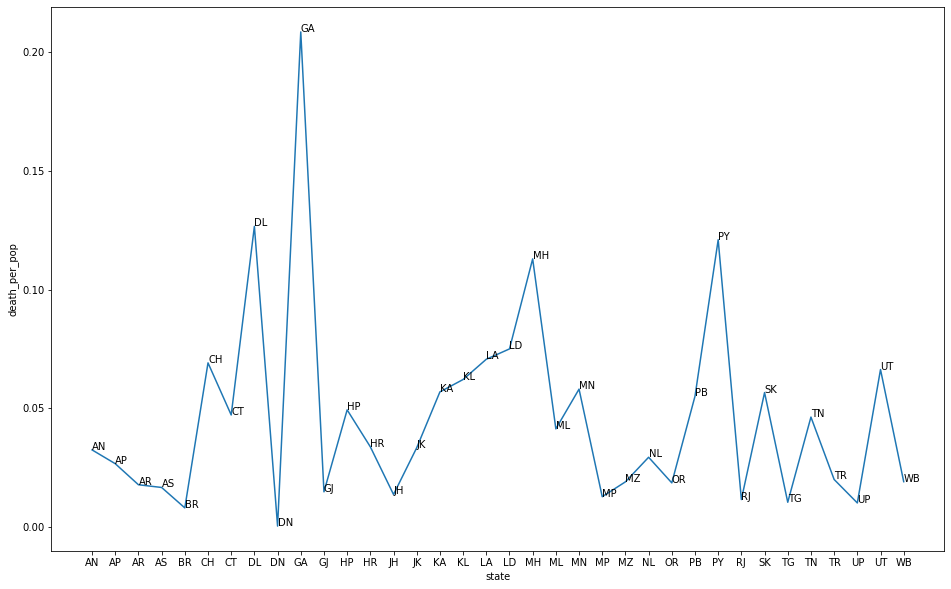

In [20]:
fig,ax=plt.subplots(figsize=(16,10))
sns.lineplot(x=states_grp.index,y=states_grp.death_per_pop,ax=ax)

for x in states_grp.index.unique():
    point_y=point_y=states_grp[states_grp.index==x]['death_per_pop']
    ax.annotate(x,xy=(x,point_y),xytext=(x,point_y))

### So, we can see that *Goa* has highest percentage by good margin than the second and third lowest *Delhi* and *Puducherry* followed by *Maharastra*.

### Now, lets analyse the relationship between the rise in daily confirmed covid cases and the number of deaths.

<AxesSubplot:xlabel='confirmed', ylabel='deceased'>

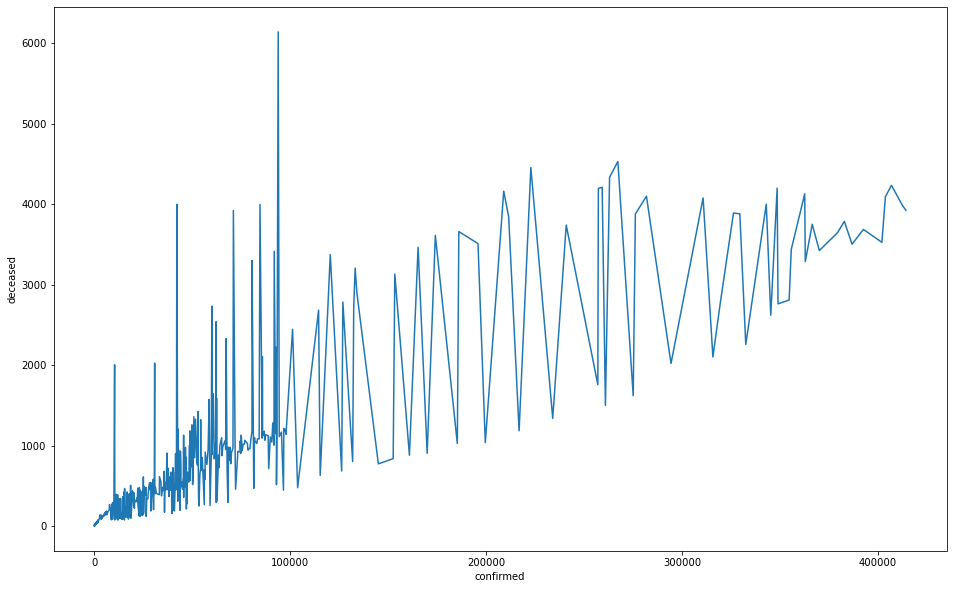

In [21]:
fig,ax=plt.subplots(figsize=(16,10))
sns.lineplot(x=grouped_dates.confirmed,y=grouped_dates.deceased,ax=ax)

### So, it seems as a linear relationship between the two variables, when we see the rise in number of daily cases then we may also see the number of deaths going up.

### Now, analysing the relationship between testing and number of cases detected per day.

<AxesSubplot:xlabel='tested', ylabel='confirmed'>

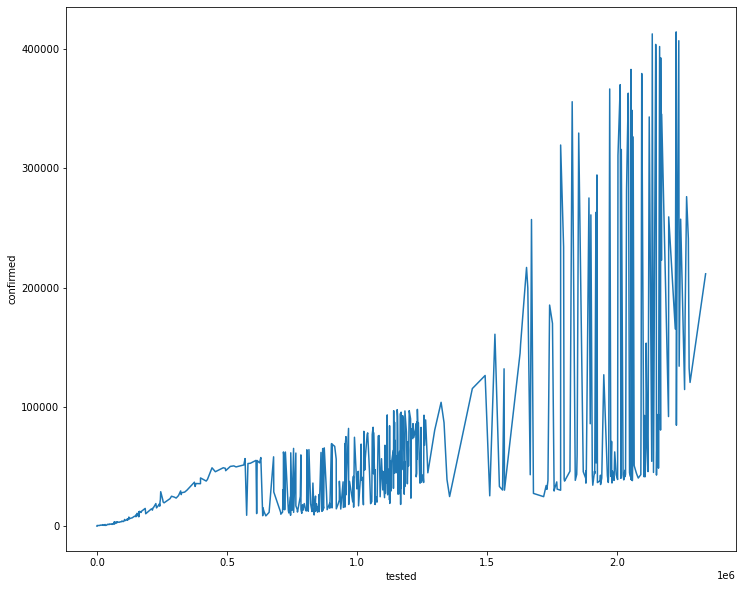

In [22]:
plt.figure(figsize=(12,10))
sns.lineplot(data=grouped_dates,x='tested',y='confirmed')

### We could see clearly that as the number of test per day grew there was an increase in the number of daily covid cases. So, by increasing the testing we could also catch the spread of the virus given we quarantine those sympotmatic cases.

### Now, lets analyse the recovery rate of the country. 

#### Recovery rate can be given by ratio of number of people recovered on ***nth*** day to the total number of active cases on that day.

### In order to calculate recovery rate we should keep in mind that when we have 0 active cases then recovery rate will be undefined. So, it is best to remove the rows having 0 active cases.

In [23]:
grouped_dates[grouped_dates.active==0]

,dates,confirmed,tested,deceased,recovered,vaccinated,population,active
3,2020-02-14,0,0,0,3,0,35125000,0


#### We only have 1 row where active case corresponds to 0, rest have been kept as it is.

Dropping the index with 0 active case.

In [24]:
grouped_dates.drop(3,axis=0,inplace=True)
grouped_dates[grouped_dates.active==0]

,dates,confirmed,tested,deceased,recovered,vaccinated,population,active


#### Calculating recovery rate and plotting the same to better understand the condition of the country reeling under Covid.

In [25]:
grouped_dates.eval('rec_rate=(recovered+deceased)/active*100',inplace=True)

<AxesSubplot:xlabel='dates', ylabel='rec_rate'>

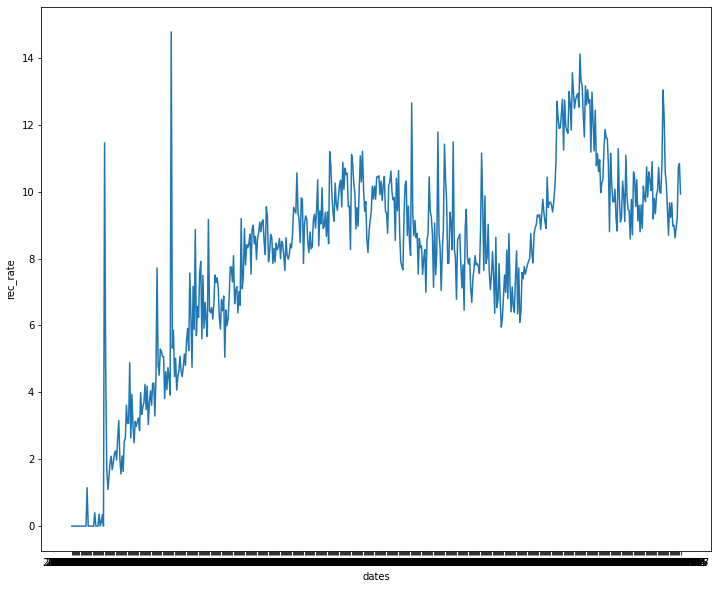

In [26]:
fig,ax=plt.subplots(figsize=(12,10))
sns.lineplot(data=grouped_dates,y='rec_rate',x='dates',ax=ax)


### We can clearly see the rise in recovery rate then a slump for a few months and recovering again. This is a positive sign should we keep moving in the right direction.

## Let's calculate case fatality ratio.

### Case fatality ratio is given by number of deaths to total number of cases detected till now.

In [27]:
grouped_dates.eval('fatality_ratio=deceased/confirmed*100',inplace=True)

grouped_dates

,dates,confirmed,tested,deceased,recovered,vaccinated,population,active,rec_rate,fatality_ratio
0,2020-01-30,1,0,0,0,0,35125000,1,0.000000,0.000000
1,2020-02-02,1,0,0,0,0,35125000,2,0.000000,0.000000
2,2020-02-03,1,0,0,0,0,35125000,3,0.000000,0.000000
4,2020-03-02,2,0,0,0,0,92159000,2,0.000000,0.000000
5,2020-03-03,1,0,0,0,0,169423000,3,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
554,2021-09-03,42667,1936633,342,36422,6250994,1332898000,412247,8.917955,0.801556
555,2021-09-04,42607,1905343,309,38087,7458316,1332898000,416458,9.219657,0.725233
556,2021-09-05,39537,1797044,218,43922,2871996,1332898000,411855,10.717364,0.551382
557,2021-09-06,30164,1567539,290,42946,11520772,1332898000,398783,10.841987,0.961411


<AxesSubplot:xlabel='dates', ylabel='fatality_ratio'>

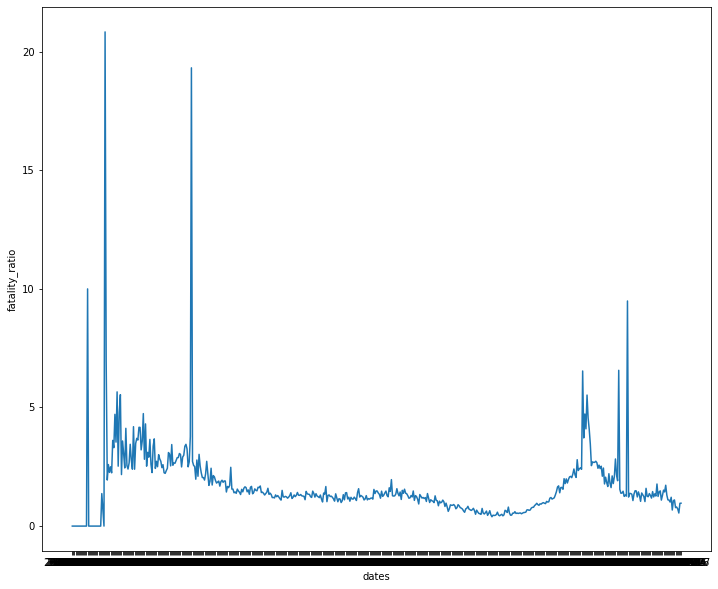

In [28]:
fig,ax=plt.subplots(figsize=(12,10))

sns.lineplot(data=grouped_dates,x='dates',y='fatality_ratio')

### we see two peaks for case fatality ratio and currently it is in downward trend which is a good sign.

### Now lets calculate and plot fatality_ratio for each state.

In [29]:
states_grp.eval('fatality_ratio=deceased/confirmed*100',inplace=True)

states_grp.sort_values(by='fatality_ratio',ascending=False)

,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff,test_per_pop,death_per_pop,fatality_ratio
state,,,,,,,,,,
PB,600877,13685244,16447,584110,15152933,29859000,2.012382,45.832895,0.055082,2.737166
UT,343139,7004656,7389,329327,9061547,11141000,3.079966,62.872776,0.066323,2.153355
MH,6493698,55159364,137897,6304336,64078584,122153000,5.316036,45.155963,0.112889,2.123551
NL,30435,335439,632,28178,893349,2150000,1.415581,15.601814,0.029395,2.076557
GA,174560,1245528,3210,170496,1645284,1540000,11.335065,80.878442,0.208442,1.838909
DL,1438041,26122321,25083,1412572,14440177,19814000,7.257702,131.837696,0.126592,1.744248
ML,77280,994185,1333,74018,1370372,3224000,2.397022,30.837004,0.041346,1.724896
AN,7573,504146,129,7437,374330,397000,1.907557,126.988917,0.032494,1.703420
HP,214911,3260732,3602,209610,7400812,7300000,2.943986,44.667562,0.049342,1.676043


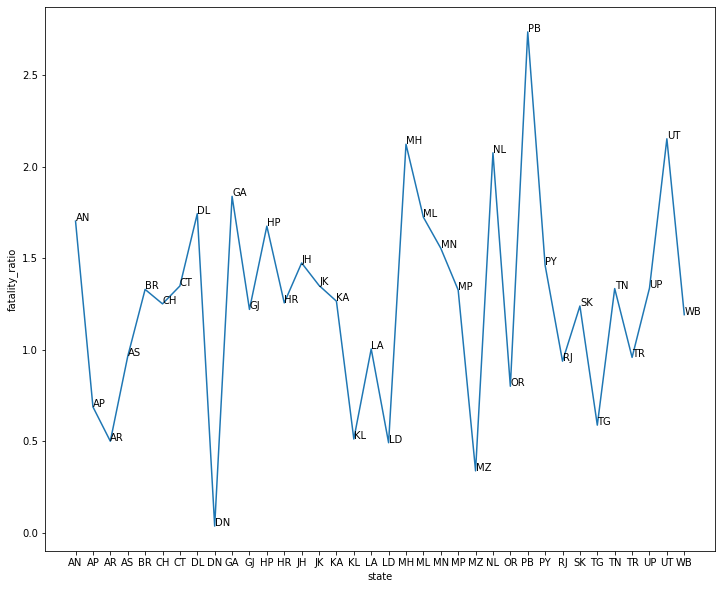

In [30]:
fig,ax=plt.subplots(figsize=(12,10))

sns.lineplot(data=states_grp,x='state',y='fatality_ratio')

for x in states_grp.index.unique():
    point_y=states_grp[states_grp.index==x]['fatality_ratio']
    ax.annotate(x,xy=(x,point_y),xytext=(x,point_y))

### Surprisingly, Punjab has highest deaths among the people that got infected with Covid where Mizoram has lowest fatality rate compared to every states.

### Now, Let' see which state has highest percetage of active cases currently.

### First, we need to add the 'active' column in *states_grp* dataframe

In [31]:
states_grp.eval('active=confirmed-(recovered+deceased)',inplace=True)

states_grp

,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff,test_per_pop,death_per_pop,fatality_ratio,active
state,,,,,,,,,,,
AN,7573,504146,129,7437,374330,397000,1.907557,126.988917,0.032494,1.703420,7
AP,2023242,27037651,13935,1994855,32204948,52221000,3.874384,51.775437,0.026685,0.688746,14452
AR,53474,1080325,268,52595,1002119,1504000,3.555452,71.830120,0.017819,0.501178,611
AS,593087,22218172,5719,580911,19094972,34293000,1.729470,64.789234,0.016677,0.964277,6457
BR,725765,42858554,9656,716054,42214293,119520000,0.607233,35.858897,0.008079,1.330458,55
CH,65124,685856,815,64275,1172616,1179000,5.523664,58.172689,0.069126,1.251459,34
CT,1004724,12572452,13557,990803,14704251,28724000,3.497855,43.769851,0.047197,1.349326,364
DL,1438041,26122321,25083,1412572,14440177,19814000,7.257702,131.837696,0.126592,1.744248,386
DN,10668,72410,4,10631,791497,959000,1.112409,7.550574,0.000417,0.037495,33


In [32]:
"""Sorting by active column"""

states_grp.sort_values(by='active',ascending=False)

,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff,test_per_pop,death_per_pop,fatality_ratio,active
state,,,,,,,,,,,
KL,4253298,32670564,21820,3993877,30434537,35125000,12.109033,93.012282,0.062121,0.513014,237601
MH,6493698,55159364,137897,6304336,64078584,122153000,5.316036,45.155963,0.112889,2.123551,51465
KA,2956988,44568501,37441,2902089,46099277,65798000,4.494039,67.735343,0.056903,1.266187,17458
TN,2625778,43428075,35055,2574518,36016223,75695000,3.468892,57.372449,0.046311,1.335033,16205
AP,2023242,27037651,13935,1994855,32204948,52221000,3.874384,51.775437,0.026685,0.688746,14452
MZ,66910,908982,227,54697,941126,1192000,5.613255,76.256879,0.019044,0.339262,11986
WB,1553177,17272409,18522,1526268,44680978,96906000,1.602767,17.823880,0.019113,1.192523,8387
OR,1013567,18534435,8123,998591,24363416,43671000,2.320915,42.441059,0.018600,0.801427,6853
AS,593087,22218172,5719,580911,19094972,34293000,1.729470,64.789234,0.016677,0.964277,6457


### Kerala has highest number of active cases which is almost 60% of the total active cases in the country.

### Lets add the percentage share column of each state in country's total active cases.

In [33]:
states_grp.eval('perc_active=active/active.sum()*100',inplace=True)

states_grp.sort_values(by='perc_active',ascending=False)

,confirmed,tested,deceased,recovered,vaccinated,population,perc_pop_aff,test_per_pop,death_per_pop,fatality_ratio,active,perc_active
state,,,,,,,,,,,,
KL,4253298,32670564,21820,3993877,30434537,35125000,12.109033,93.012282,0.062121,0.513014,237601,59.491719
MH,6493698,55159364,137897,6304336,64078584,122153000,5.316036,45.155963,0.112889,2.123551,51465,12.886062
KA,2956988,44568501,37441,2902089,46099277,65798000,4.494039,67.735343,0.056903,1.266187,17458,4.371221
TN,2625778,43428075,35055,2574518,36016223,75695000,3.468892,57.372449,0.046311,1.335033,16205,4.057488
AP,2023242,27037651,13935,1994855,32204948,52221000,3.874384,51.775437,0.026685,0.688746,14452,3.618564
MZ,66910,908982,227,54697,941126,1192000,5.613255,76.256879,0.019044,0.339262,11986,3.001114
WB,1553177,17272409,18522,1526268,44680978,96906000,1.602767,17.823880,0.019113,1.192523,8387,2.099979
OR,1013567,18534435,8123,998591,24363416,43671000,2.320915,42.441059,0.018600,0.801427,6853,1.715888
AS,593087,22218172,5719,580911,19094972,34293000,1.729470,64.789234,0.016677,0.964277,6457,1.616736


### Kerala has highest share in total active cases in the country followed by Maharastra which has 12% of country's active cases.

### More than 80 % of the cases are from south & South Western States. First five of them actually.

### Let's plot 'perc_active' column statewise to have a clear understanding of current active cases across the Country.

<AxesSubplot:xlabel='state', ylabel='perc_active'>

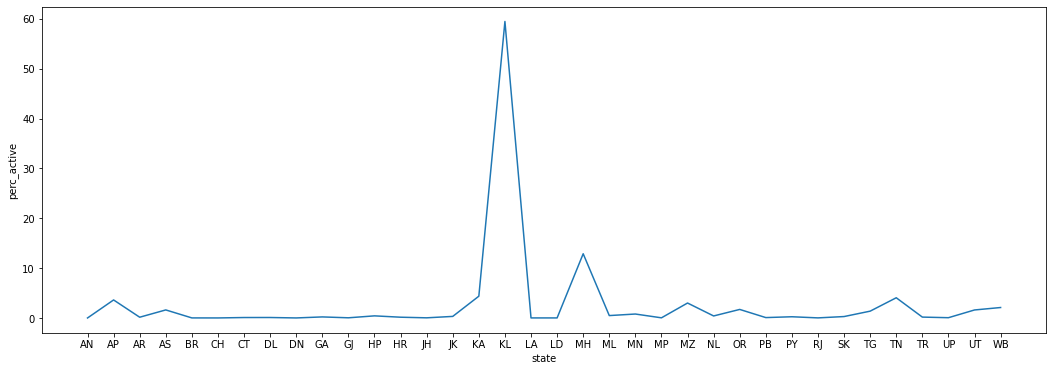

In [34]:
fig,ax=plt.subplots(figsize=(18,6))

sns.lineplot(x=states_grp.index,y=states_grp.perc_active)


### Almost, all of the states have less than 5% active cases from country other than Kerala and Maharastra.

### Now, lets study the impact of vaccination on the number of active cases in the country.

### We will only consider the active cases data after 15th January,2021. Actually, from only then you will the vaccination number greater than zero.

Text(437    2021-05-09
Name: dates, dtype: object, 437    3750934
Name: active, dtype: int64, '12.54 % people are vaccinated when India hit peak in second wave')

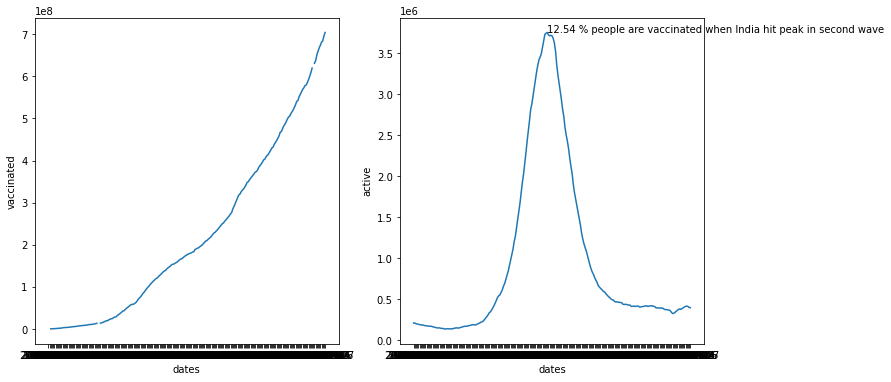

In [79]:
# number of vaccinated people by every date
v_nated=grouped_dates[grouped_dates.vaccinated>0]['vaccinated'].cumsum()    

#active cases from the vaccination start date till now
act_cases=grouped_dates[grouped_dates.dates>'2021-01-15']['active']

# dates will ploteed on x_axis for comparison
ran_dates=grouped_dates[grouped_dates.dates>'2021-01-15']['dates']

#calculating the percentage of population vaccinated when country hit peak of second wave
total_population=states_grp.population.sum()
peak_date_index=grouped_dates[grouped_dates.active==grouped_dates.active.max()].index
peak_date_vacc=grouped_dates['vaccinated'].cumsum()[peak_date_index]
perc_vacc=round((peak_date_vacc/total_population*100).values[0],2)

#plotting
fig,ax=plt.subplots(1,2,figsize=(12,6),sharey=False)

sns.lineplot(x=ran_dates,y=v_nated,ax=ax[0])
sns.lineplot(x=ran_dates,y=act_cases,ax=ax[1])

#perparing to annotate the peak active cases with percentage vaccinated population.

text=f'{perc_vacc} % people are vaccinated when India hit peak in second wave'
x_text=grouped_dates[grouped_dates.active==grouped_dates.active.max()]['dates']
y_text=grouped_dates[grouped_dates.active==grouped_dates.active.max()]['active']

ax[1].annotate(text=text,xy=(x_text,y_text),xytext=(x_text,y_text))
# ax.legend(['vaccination','active cases'])



### We can see, there is no specific relation between the number of active cases and the number of vaccinated people in the population which is increasing as the day goes.

### India hit highest number of active covid cases on 9th May,2021 almost after 4 months since the country has started vaccinating. Vaccination covered a total of 12% people till 9th May,2021 which is far less given the population of the country.

### Given the graphics we see above, there is uncertainity whether vaccination will put stop to this pandemic since we still have more than 3.5 lakh cases with more than 50% vaccinated given we had same number of active cases earlier this year with far less percentage of vaccinated people. Only time will tell.

# End of the Notebook